DIABETES HEALTH INDICATOR

- Understand the Problem Statement

- Data Collection

- Data Cleaning 

- Exploratory Data Analysis

- Data Pre-Processing

- Model Training

- Model Selection



1. PROBLEM STATEMENT

This machine learning project entails building the best model to predict diabetes leveraging on vital variables and patient's medical history

2.0 DATA COLLECTION

This dataset diabetes health indicator was collected from UCI machine learning repository.

2.1 Loading the Dataset into DataFrame

In [1]:
# import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
diabetes_df = pd.read_csv('data\diabetes_binary_health_indicators_BRFSS2015.csv')

In [3]:
# view few records of the dataset

diabetes_df.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [4]:
# verify the dataset dimension

diabetes_df.shape

(253680, 22)

In [5]:
# view the variables for the records

diabetes_df.columns



Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

3. Data Cleaning and Checks

- Dataset Info

- Check for Missing/Null values

- Check for duplicate  columns

- Check for unique values

In [6]:
# dataset info
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
# change the type of the Diabetes_binary to 0 and 1 from float type

diabetes_df['Diabetes_binary'] = diabetes_df['Diabetes_binary'].astype(int)
diabetes_df['Sex'] = diabetes_df['Sex'].astype(int)

In [8]:
diabetes_df.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0,9.0,4.0,3.0
1,0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0,7.0,6.0,1.0
2,0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0,9.0,4.0,8.0
3,0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0,11.0,3.0,6.0
4,0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0,11.0,5.0,4.0


In [9]:
# missing/null values
diabetes_df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [10]:
print(diabetes_df.duplicated().sum())

24206


In [11]:
# drop duplicate columns
diabetes_df = diabetes_df.drop_duplicates()

In [12]:
diabetes_df.shape

(229474, 22)

In [13]:
# check if there are still any duplicate columns
print(diabetes_df.duplicated().sum())

0


In [14]:
# unique values

diabetes_df.nunique()

Diabetes_binary          2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [15]:
# statistical distribution
diabetes_df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.00000,229474.000000,229474.000000,229474.000000,229474.000000,...,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000
mean,0.152945,0.454343,0.441640,0.959481,28.687507,0.46580,0.044816,0.103336,0.733042,0.612675,...,0.946011,0.092921,2.601820,3.509866,4.681219,0.185751,0.439087,8.085068,4.979741,5.888615
std,0.359936,0.497912,0.496584,0.197173,6.789204,0.49883,0.206899,0.304398,0.442371,0.487140,...,0.225996,0.290323,1.064962,7.717643,9.050877,0.388906,0.496277,3.094451,0.992989,2.092888
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,4.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.00000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.00000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


4. EXPLORATORY DATA ANALYSIS

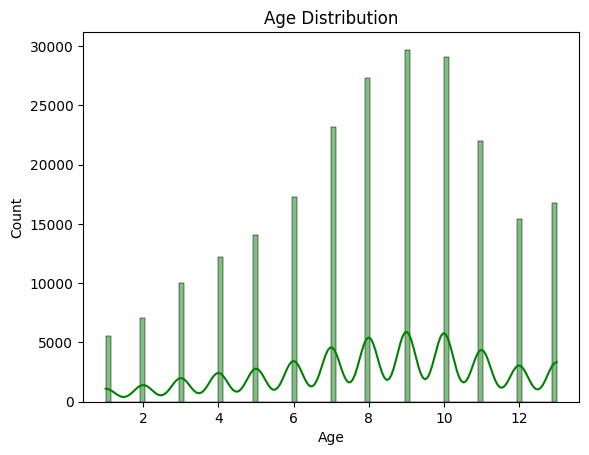

In [16]:
# Age distribution
sns.histplot(diabetes_df['Age'], kde=True, color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

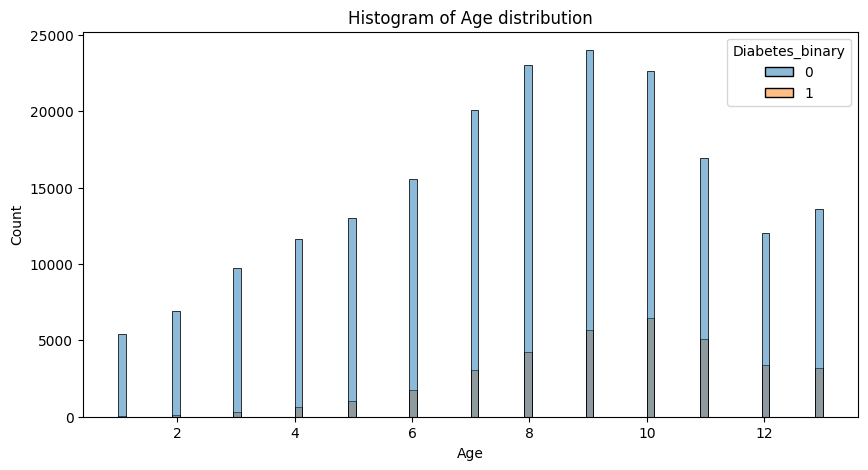

In [17]:
plt.figure(figsize=(10, 5))
plt.title('Histogram of Age distribution')
sns.histplot(x='Age', hue='Diabetes_binary', data=diabetes_df)
plt.show()

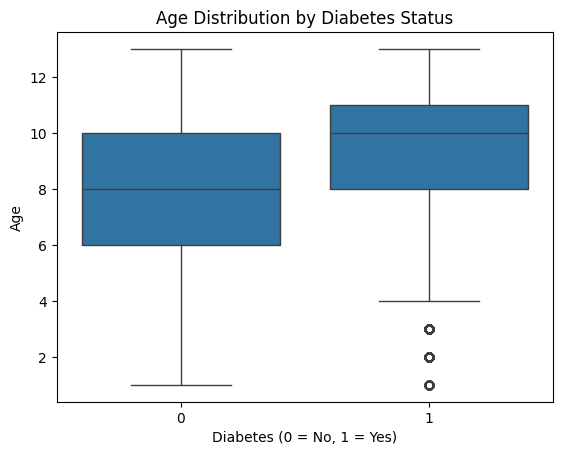

In [18]:
# Age distribution in relation to diabetes

sns.boxplot(x='Diabetes_binary', y='Age', data=diabetes_df)
plt.title('Age Distribution by Diabetes Status')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

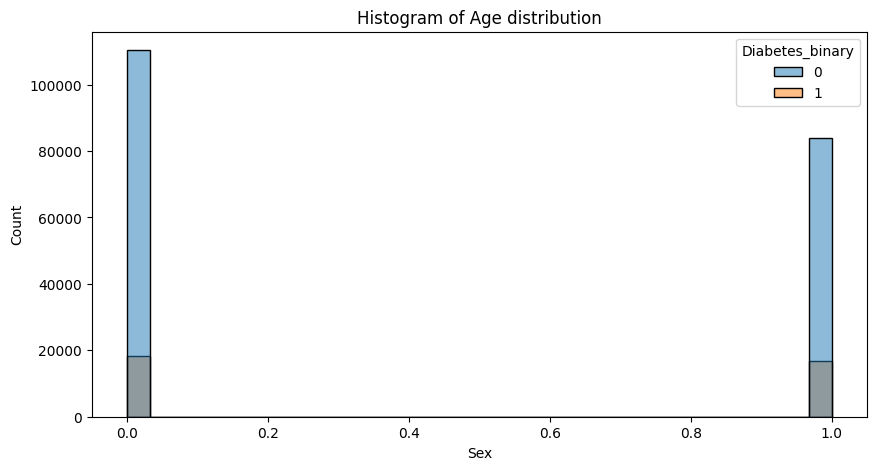

In [19]:
plt.figure(figsize=(10, 5))
plt.title('Histogram of Age distribution')
sns.histplot(x='Sex', hue='Diabetes_binary', data=diabetes_df)
plt.show()

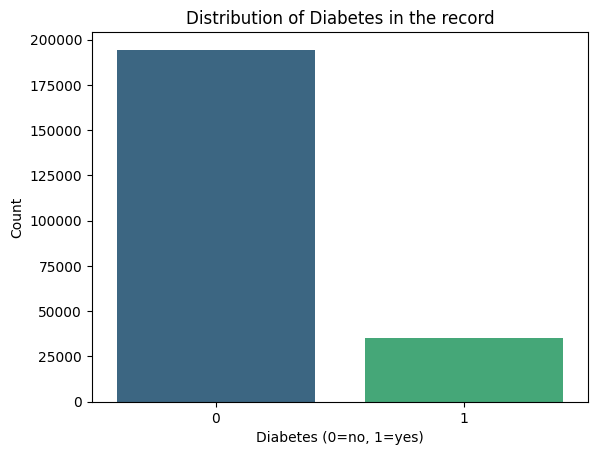

In [20]:
#countplot for the target variable

sns.countplot(x='Diabetes_binary', data=diabetes_df, palette='viridis')
plt.title('Distribution of Diabetes in the record')
plt.xlabel('Diabetes (0=no, 1=yes)')
plt.ylabel('Count')
plt.show()

The distribution above shows class imbalance which will be addressed at the data pre-processing stage

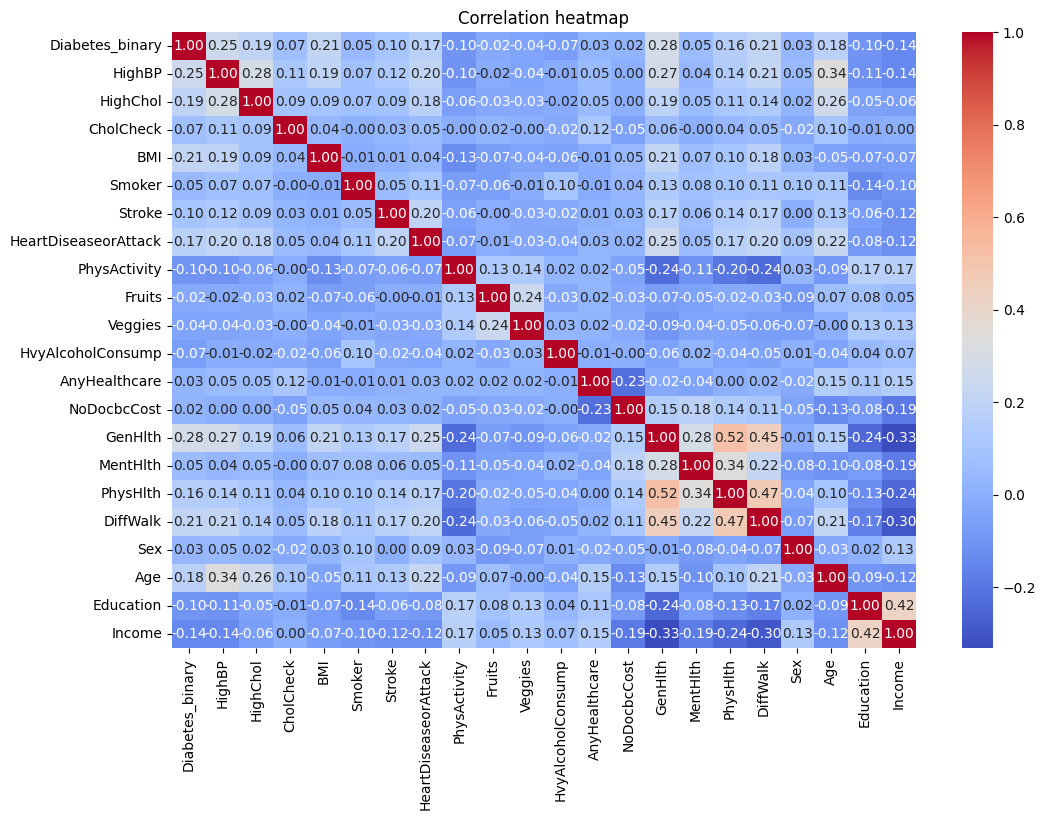

In [21]:
# correlatioin analysis

correlation_heatmap = diabetes_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_heatmap, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation heatmap')
plt.show()

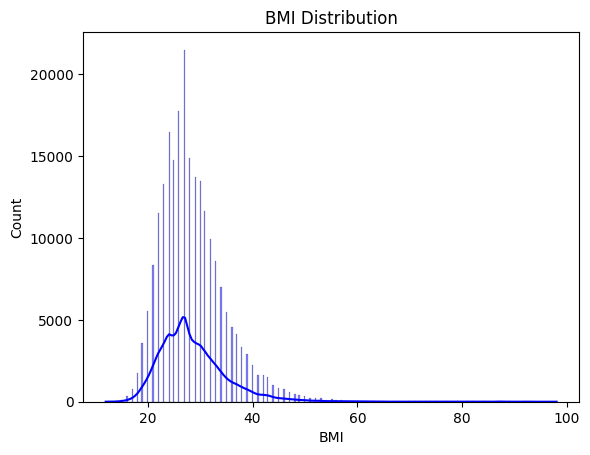

In [22]:
# BMI distribution towards diabetes

sns.histplot(diabetes_df['BMI'], color='blue', kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')

plt.show()

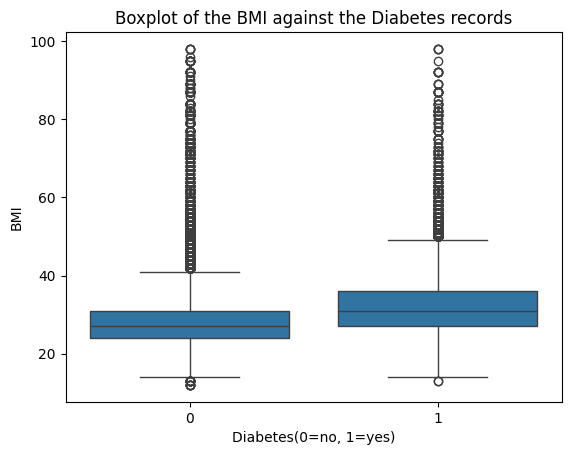

In [23]:
sns.boxplot(x='Diabetes_binary', y='BMI', data=diabetes_df)
plt.title('Boxplot of the BMI against the Diabetes records')
plt.xlabel('Diabetes(0=no, 1=yes)')
plt.ylabel('BMI')
plt.show()

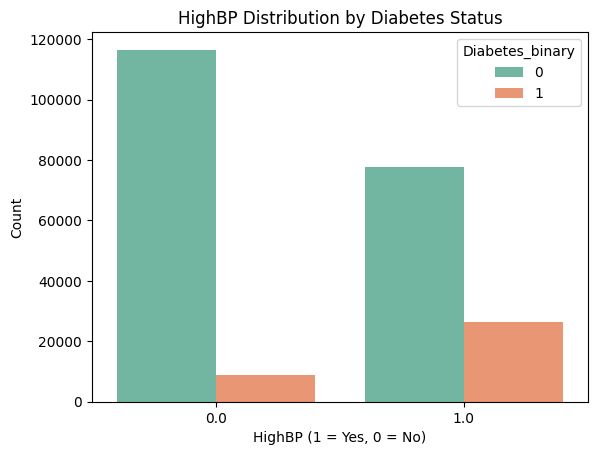

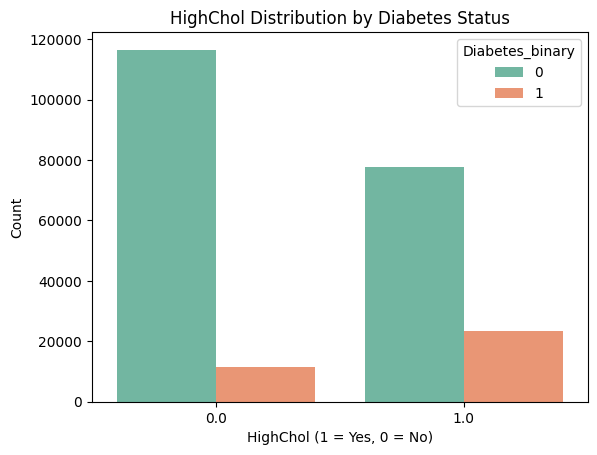

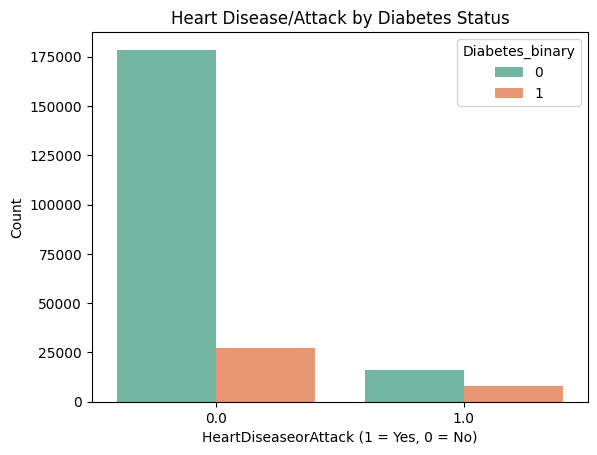

In [24]:
# Countplot for HighBP
sns.countplot(x='HighBP', hue='Diabetes_binary', data=diabetes_df, palette='Set2')
plt.title('HighBP Distribution by Diabetes Status')
plt.xlabel('HighBP (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

# Countplot for HighChol
sns.countplot(x='HighChol', hue='Diabetes_binary', data=diabetes_df, palette='Set2')
plt.title('HighChol Distribution by Diabetes Status')
plt.xlabel('HighChol (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

# Countplot for HeartDiseaseorAttack
sns.countplot(x='HeartDiseaseorAttack', hue='Diabetes_binary', data=diabetes_df, palette='Set2')
plt.title('Heart Disease/Attack by Diabetes Status')
plt.xlabel('HeartDiseaseorAttack (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

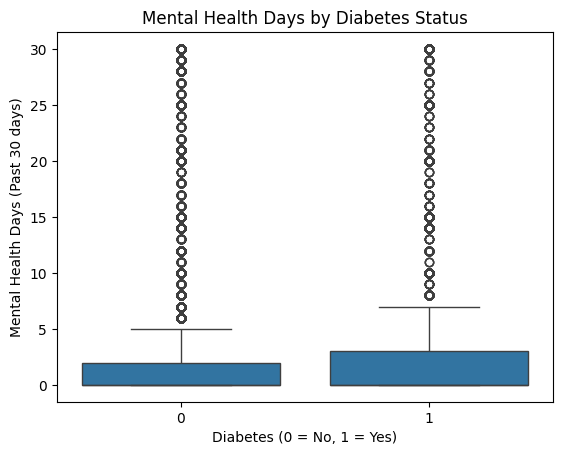

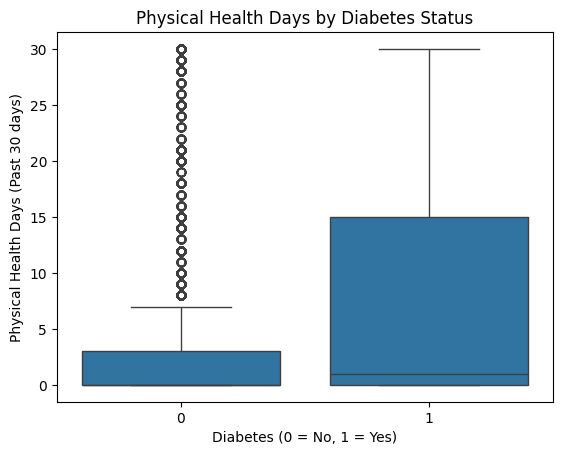

In [25]:
# impact of high blood pressure on diabetes

# Boxplot for HighBP vs Diabetes_binary
sns.boxplot(x='Diabetes_binary', y='MentHlth', data=diabetes_df)
plt.title('Mental Health Days by Diabetes Status')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Mental Health Days (Past 30 days)')
plt.show()

# Boxplot for PhysHlth vs Diabetes_binary
sns.boxplot(x='Diabetes_binary', y='PhysHlth', data=diabetes_df)
plt.title('Physical Health Days by Diabetes Status')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Physical Health Days (Past 30 days)')
plt.show()

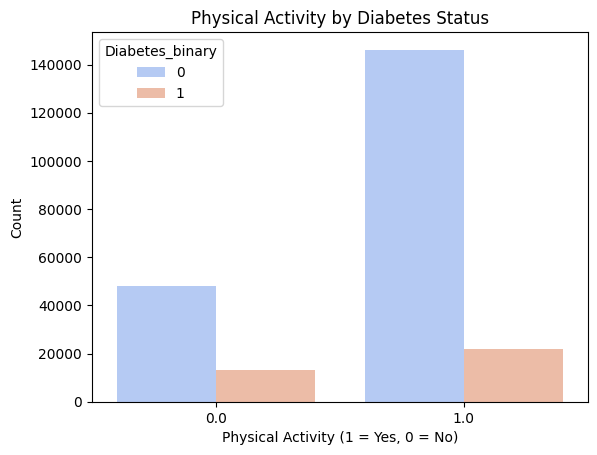

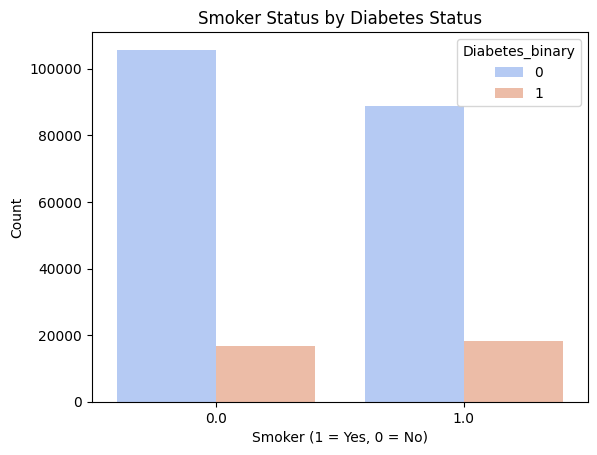

In [26]:
# Physical Activity vs Diabetes
sns.countplot(x='PhysActivity', hue='Diabetes_binary', data=diabetes_df, palette='coolwarm')
plt.title('Physical Activity by Diabetes Status')
plt.xlabel('Physical Activity (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

# Smoker status vs Diabetes
sns.countplot(x='Smoker', hue='Diabetes_binary', data=diabetes_df, palette='coolwarm')
plt.title('Smoker Status by Diabetes Status')
plt.xlabel('Smoker (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

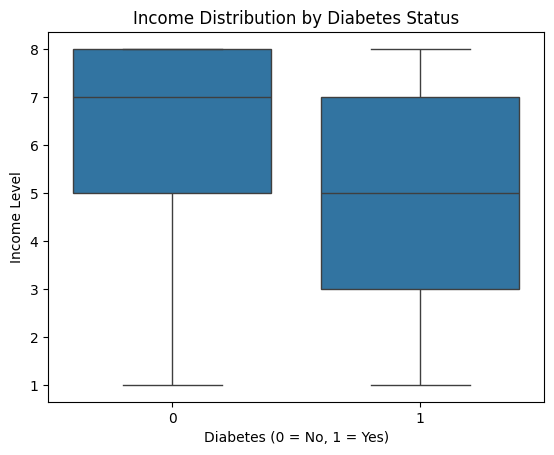

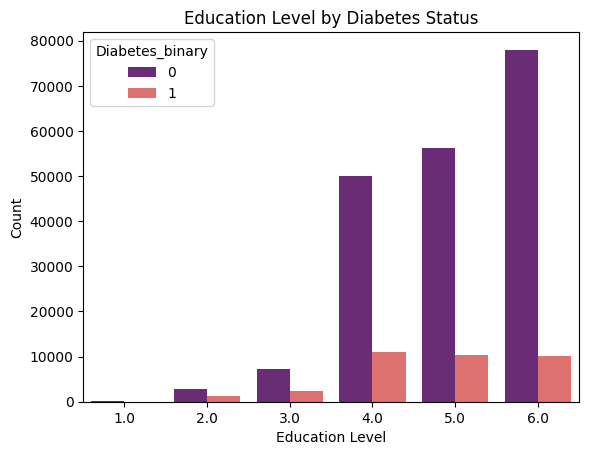

In [27]:
# Income levels by Diabetes status
sns.boxplot(x='Diabetes_binary', y='Income', data=diabetes_df)
plt.title('Income Distribution by Diabetes Status')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Income Level')
plt.show()

# Education levels by Diabetes status
sns.countplot(x='Education', hue='Diabetes_binary', data=diabetes_df, palette='magma')
plt.title('Education Level by Diabetes Status')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

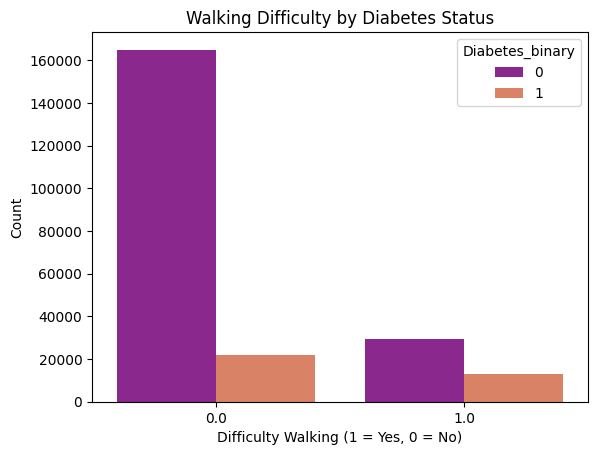

In [28]:
# Correlation between walking difficulty and Diabetes

sns.countplot(x='DiffWalk', hue='Diabetes_binary', data=diabetes_df, palette='plasma')
plt.title('Walking Difficulty by Diabetes Status')
plt.xlabel('Difficulty Walking (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

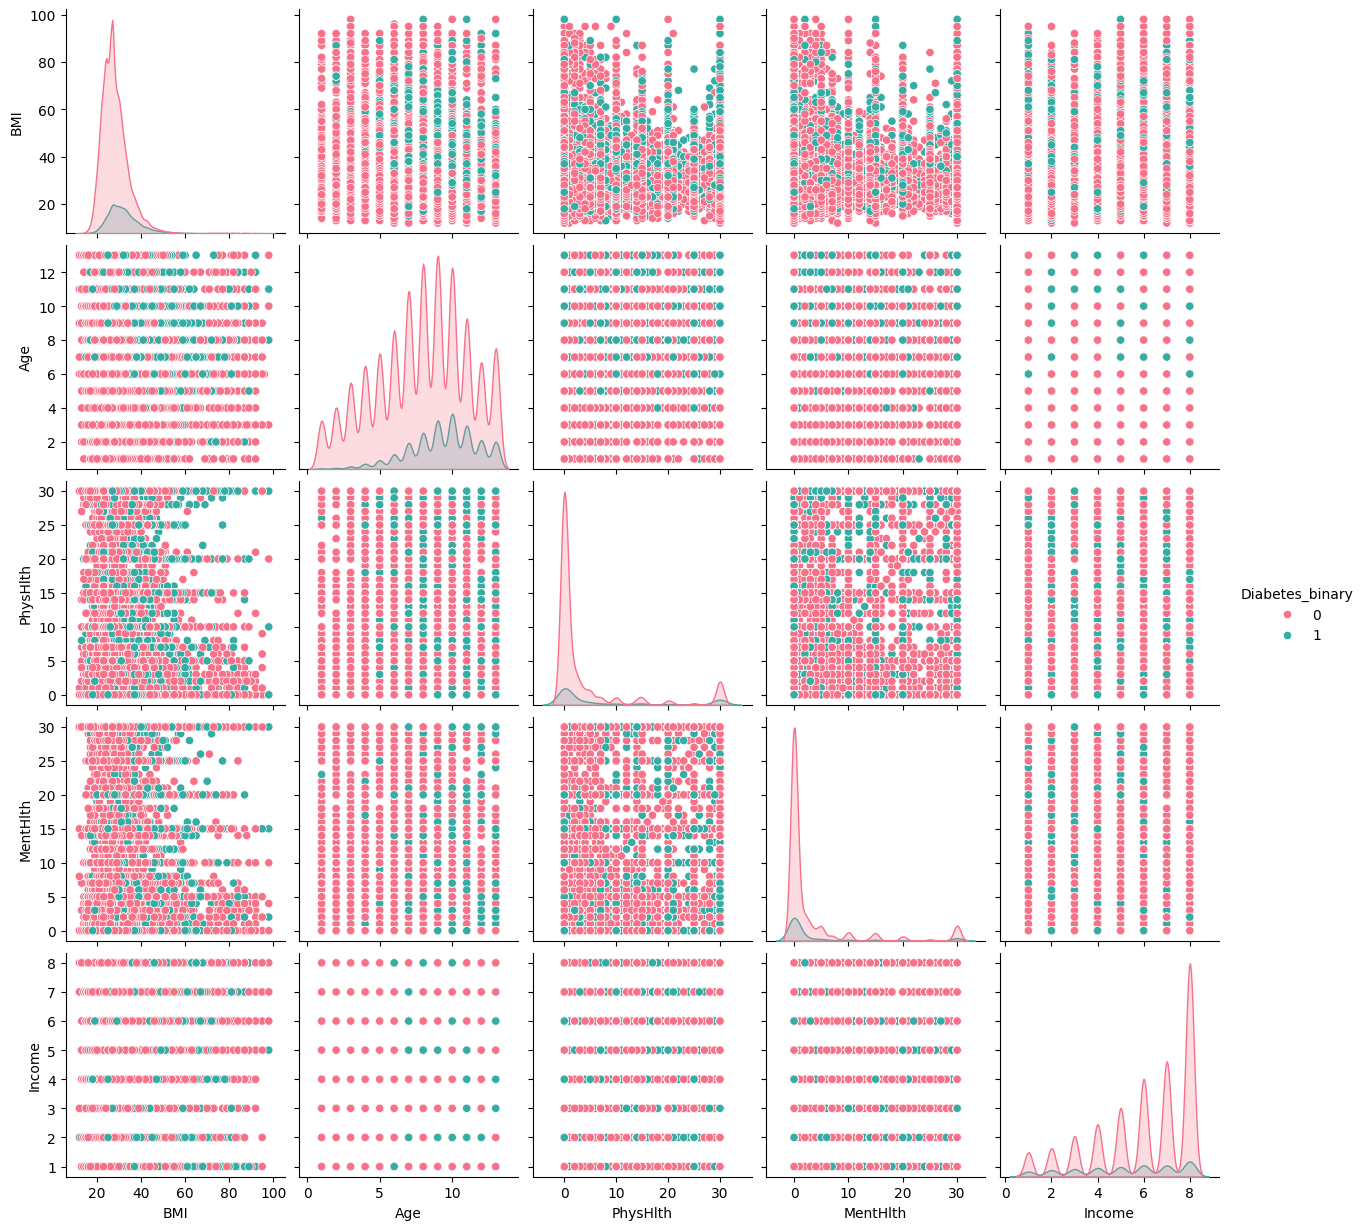

In [29]:
# pairplot for selected critical features

selected_features = ['BMI', 'Age', 'PhysHlth', 'MentHlth', 'Income', 'Diabetes_binary']
sns.pairplot(diabetes_df[selected_features], hue='Diabetes_binary', palette='husl')
plt.show() 

In [33]:
# create a new excel file of the cleaned dataset

diabetes_df.to_csv('diabetes_cleaned.csv')